# **Topic: Python For ML Final Exam**

# **Md Kamruzzaman**

## Question_01:
- Load the TrainingHours column into a NumPy array.

    - Convert to float datatype

    - Find mean & standard deviation

- Final output: Two numeric values


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# solution_01:

# load file

df = pd.read_csv('final-employee-ds.csv')

df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [5]:
# the TrainingHours column into a NumPy array

arr = np.array(df['TrainingHours'])

print('Numpy Array: ', arr)

print("Type : ", type(arr))

print("Data Type: ", arr.dtype)


Numpy Array:  [ 4 18 13 25  3 24 44 41 24 17 39  7 38 39 13 31 37 32 22 14 32 24 16 32
 46  1 13 39 39 38  5  5  2  6  7 41 14 46 28 32 29 38 26 35 28 37 32 36
 26 32  3 21  1  9  4  9 32 37 12 30 46 35 44 23 14 28  7  4 28 46  3 11
 44  1 26 30 35 35 25 42 26  4 19 10  9 39 37  5  7 22 46 25 45 42 11 25
 12 39 17 24]
Type :  <class 'numpy.ndarray'>
Data Type:  int64


In [6]:
# Convert to float datatype
arr = arr.astype(np.float64)

print("Data type: ", arr.dtype)

# another way:
# arr = np.array(df['TrainingHours'],dtype = np.float64)
# print("Data Type: ", arr.dtype)

Data type:  float64


In [8]:
# another way:

mean_val = np.mean(arr)

std_val = np.std(arr)

print("Mean Value: ", mean_val)
print(f"Standard deviation: {std_val:.2f}")

Mean Value:  24.19
Standard deviation: 13.84


In [7]:
# # Find mean & standard deviation

# # mean
# mean_val = arr.mean()

# # standard deviation
# std_val = arr.std()

# ## Final output: Two numeric values

# print("Mean Value: ", mean_val)
# print(f"Standard deviation: {std_val:.2f}")


Mean Value:  24.19
Standard deviation: 13.84


## Q.N_02:

- Handle missing values (if any):

    - Fill missing Salary with department-wise median

    - Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5


- Final output: One numeric value

In [9]:
df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [10]:
# To see the absence of Salary
df[['Salary']].describe()

# here 4 Salary values is absent

,Salary
count,96.000000
mean,98857.822917
std,33043.206562
min,43343.000000
25%,67584.750000
50%,100281.500000
75%,131696.750000
max,148940.000000


#### Way_01: use apply() function

In [11]:
# group by Department wise

group_dep = df.groupby('Department')

In [12]:
# To see the each department median value
group_dep['Salary'].median()

,Salary
Department,
Finance,91991.0
HR,84078.0
IT,104272.5
Management,106801.0
Marketing,110766.5


In [13]:
# use apply function and fill NaN value with each department median value

def fill_na(salary):
    salary = salary.fillna(salary.median())

    return salary

group_dep['Salary'].apply(fill_na)


Department    
Finance     1      47805.0
            4      85543.0
            12     99638.0
            13    113666.0
            19     91991.0
                    ...   
Marketing   80    146306.0
            81    137856.0
            93    132658.0
            95     67350.0
            98     65351.0
Name: Salary, Length: 100, dtype: float64

In [ ]:
#### Way_02: use lambda() function

#### Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

In [14]:
# Filter employees based on conditions
filtered_df = df[(df["ExperienceYears"] > 12) & (df["ProjectCount"] > 5)]

# Calculate total salary for filter employees
total_salary = filtered_df["Salary"].sum()

print("Total Salary:", total_salary)

Total Salary: 1789512.0


In [15]:
# without filter the total salary of employees
without_filter_total_salary = df['Salary'].sum()

print("Without Filter the Total Salary: ", without_filter_total_salary)

Without Filter the Total Salary:  9490351.0


In [17]:
# Numbers of Employees that
exp = (df['ExperienceYears']>12).sum()
pj_count = ((df['ProjectCount']>5)).sum()


both_exp_pj = ((exp) & (pj_count)).sum()

print(f"Total Employees who have experience Greater than: {exp} years")
print(f"Total Employees who have Project count Greater than: {pj_count}")
print(f"Total Employees who have Both: {both_exp_pj}")


Total Employees who have experience Greater than: 40 years
Total Employees who have Project count Greater than: 45
Total Employees who have Both: 40


### Q.n_03:

- Filter employees who:

    - Department = "IT" or "Finance"

    - Age between 30–45

    - PerformanceScore > 88

    - Sort by Salary descending


- Final output: Table with Name, Department, Salary, PerformanceScore

#### Department = "IT" or "Finance"

In [21]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [22]:
# Filter with employee based on Department = "IT" or "Finance"

emp_dep = df.loc[
    ((df['Department'] == 'IT') |
    (df['Department'] == 'Finance')),

    ['Name', 'Department', 'Salary', 'PerformanceScore']
]
emp_dep.head()

,Name,Department,Salary,PerformanceScore
0,Employee_1,IT,86175.0,71
1,Employee_2,Finance,47805.0,68
4,Employee_5,Finance,85543.0,97
6,Employee_7,IT,43343.0,72
8,Employee_9,IT,93222.0,68


#### Age between 30–45

In [23]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [24]:
# Filter with employee based on Age between 30–45 (Exclusive)

emp_age_30_40 = df.loc[
   (( df['Age'] > 30 )&
   ( df['Age'] < 45)),

   ['Name', 'Department', 'Salary', 'PerformanceScore']
#    ['Name', 'Department', 'Salary', 'PerformanceScore', 'Age']

]

emp_age_30_40.head()

,Name,Department,Salary,PerformanceScore
1,Employee_2,Finance,47805.0,68
3,Employee_4,Marketing,60056.0,76
4,Employee_5,Finance,85543.0,97
5,Employee_6,HR,96556.0,66
6,Employee_7,IT,43343.0,72


In [26]:
# # # Filter with employee based on Age between 30–45 (inclusive)

# emp_age_30_40 = df.loc[
#    (( df['Age'] >= 30 )&
#    ( df['Age'] <= 45)),

#    ['Name', 'Department', 'Salary', 'PerformanceScore']
# #    ['Name', 'Department', 'Salary', 'PerformanceScore', 'Age']

# ]

# emp_age_30_40.head()

#### PerformanceScore > 88

In [27]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [28]:
# Filter with employee based on PerformanceScore > 88

performance = df.loc[
    df['PerformanceScore'] > 88,
    ['Name', 'Department', 'Salary', 'PerformanceScore']
]

performance.head(5)

,Name,Department,Salary,PerformanceScore
4,Employee_5,Finance,85543.0,97
7,Employee_8,Management,53500.0,99
13,Employee_14,Finance,113666.0,96
14,Employee_15,Marketing,125067.0,97
23,Employee_24,Marketing,94340.0,95


#### Sort by Salary descending

In [29]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [30]:
# Filter with employee based on Sort by Salary descending

df['Salary'].sort_values(ascending = False).head(3)


,Salary
87,148940.0
33,148761.0
80,146306.0


In [31]:
# another way

# Filter with employee based on Sort by Salary descending

new_df = df.sort_values(['Salary'], ascending = 0)

new_df.loc[:, ['Name', 'Department', 'Salary', 'PerformanceScore']].head(10)

,Name,Department,Salary,PerformanceScore
87,Employee_88,Finance,148940.0,68
33,Employee_34,Marketing,148761.0,62
80,Employee_81,Marketing,146306.0,67
42,Employee_43,Finance,144185.0,72
61,Employee_62,Marketing,144182.0,90
79,Employee_80,IT,143691.0,85
40,Employee_41,Marketing,142756.0,60
77,Employee_78,Marketing,141042.0,87
51,Employee_52,HR,140793.0,80
94,Employee_95,IT,140386.0,94


### Q.n_4:

- Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

- Filter top 5 employees by SalaryPerHour
    - Final output: Table(5 Rows) with Name, SalaryPerHour

#### Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

In [32]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [33]:
df['SalaryPerHour'] = df['Salary']/((df['WorkHoursPerWeek'] * 4))

df.head(3)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1,489.630682
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4,271.619318
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3,257.028409


#### Filter top 5 employees by SalaryPerHour

In [34]:
sort_df = df.sort_values('SalaryPerHour', ascending = False).head(5)

sort_df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
46,147,Employee_47,57,Female,Marketing,1,137379.0,35,97,2018-04-26,L,2,32,1,981.278571
27,128,Employee_28,24,Male,Management,5,135981.0,35,98,2021-05-09,M,9,39,1,971.292857
31,132,Employee_32,30,Male,IT,1,135435.0,35,78,2014-12-29,L,8,5,4,967.392857
79,180,Employee_80,32,Female,IT,5,143691.0,38,85,2020-06-15,L,6,42,5,945.335526
80,181,Employee_81,38,Female,Marketing,7,146306.0,39,67,2021-05-01,S,7,26,5,937.858974


#### Final output: Table(5 Rows) with Name, SalaryPerHour

In [35]:
sort_df.loc[:, ['Name', 'SalaryPerHour']]

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


### Q.N_5:

- Create a bar chart showing the count of employees in each Department, separated by Gender. You can
solve the question with any of the package (Matplotlib , Seaborn , Plotly )

- Dataset Columns Used:
    - Department → Categorical variable (IT, Finance, HR, Marketing, Management)


- Gender → Categorical variable (Male, Female)

- Expected Output
    - A bar chart where:
    - x-axis → Department
    - y-axis → Number of employees
    - Each bar split into Male and Female segments
    - Colors differentiate gender


In [36]:
# import seaborn
import seaborn as sns

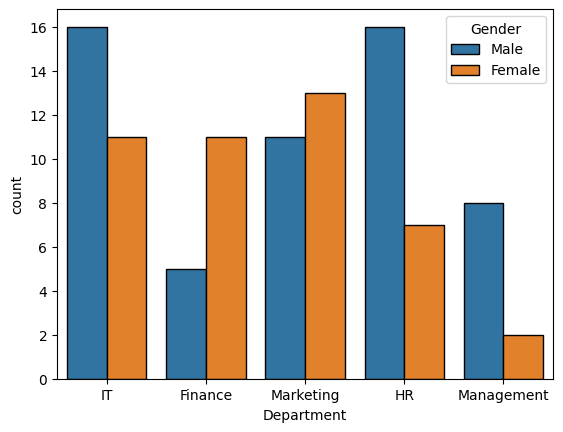

In [37]:
sns.countplot(
    data = df,
    x = 'Department',
    hue = 'Gender',
    edgecolor = 'black'
    # color = ['red','green']

)

plt.show()